# Group 10 - Homework 4

## Group Members:
1. Mahajabin Mostafa
2. Navya Madhuri Bagireddy
3. Akshay Manoj
4. Vinaika Maruvada

## PART 1

**Describe Batch Normalization.**

Deep neural networks with several layers are difficult to train because of their sensitivity to the initial random weights and the configuration of the learning algorithm.

The distribution of inputs to deep layers inside the network may change with each mini-batch when the weights are adjusted, which is one of the reasons for this difficulty. As a result, the learning algorithm could keep attempting to adjust to a changing goal. "Internal covariate shift" is the term used to describe this phenomena, in which the input distribution to network layers shifts. When training very deep networks, batch normalization is very helpful since it helps lessen the internal covariate shift that often happens during training.

Sergey Ioffe and Christian Szegedy proposed Batch Normalization (BN) in their 2015 publication as a solution to neural network challenges such as disappearing or increasing gradients. This strategy entails inserting an operation into the model right before or after the activation function of each hidden layer. Essentially, it centers and normalizes each input by zeroing its mean and standardizing its variance before adjusting the output with two new parameter vectors per layer: one for scaling and the other for shifting. This process allows the model to determine the best scale and mean of inputs for each layer.

Our neural network can manage the standardization of our training set to a great degree if we integrate a BN layer as the first layer. This suggests that we might not need to use tools like StandardScaler to manually normalize our data. This procedure is handled by the BN layer, which examines one batch at a time and has the ability to move and rescale each input feature as necessary.

It is the process by which the algorithm determines the mean and standard deviation of each input across the current mini-batch in order to zero-center and normalize the inputs. As a result, the method can calculate the standard deviation and mean for any input. The algorithm looks at the average and dispersion of each input inside the batch it's processing in order to adapt and normalize the inputs. This aids in maintaining uniformity and comparability of the inputs throughout training batches.

Assuming we have a batch of activations x at a layer, the zero-mean unit-variance version x̂ of x is-

$\widehat{x}^{(k)}=\frac{x^{(k)}-\mathrm{E}\left[x^{(k)}\right]}{\sqrt{\operatorname{Var}\left[x^{(k)}\right]}}$

Since this is a differentiable operation, batch normalization may be used in the training process.The batch normalization layer is inserted into the implementation immediately after a convolutional or fully connected layer and before nonlinear layers.
 
Forward pass of batch normalization:

Input: Values of x over a minibatch: $\mathcal{B}=\left\{x_{1 \ldots m}\right\}$ and parameters to be learned- $\gamma, \beta$ 

Output: $ \left\{y_i=\mathrm{BN}_{\gamma, \beta}\left(x_i\right)\right\} $

$\begin{aligned} & \text {Mini-batch Mean: } \mu_{\mathcal{B}} \leftarrow \frac{1}{m} \sum_{i=1}^m x_i \\ & \text {Mini-batch Variance: } \sigma_{\mathcal{B}}^2 \leftarrow \frac{1}{m} \sum_{i=1}^m\left(x_i-\mu_{\mathcal{B}}\right)^2 \\ & \text {Normalize: }  \widehat{x}_i \leftarrow \frac{x_i-\mu_{\mathcal{B}}}{\sqrt{\sigma_{\mathcal{B}}^2+\epsilon}} \\ & \text {Scale and shift: } y_i \leftarrow \gamma \widehat{x}_i+\beta \equiv \mathrm{BN}_{\gamma, \beta}\left(x_i\right) \\ & \end{aligned}$

We may normalize x using the procedure in the third line mentioned above, after calculating the mean and variance of a batch of activations x. It should be noted that in the event that our network is unable to meet the zero-mean and unit-variance constraints, we have included learnable shift and scale parameters, γ and β.

## PART 2

**Create several neural network models investigating the effect of hyperparameters
and techniques we studied on the model performance (number of layers, number of
neurons in hidden layers, optimizers, batch size and learning rate in the gradient
descent optimizers, L1 and L2 regularization, dropout, batch normalization, weight
and bias initialization, etc.)**

## AIM: 

To create several neural network models investigating the effect of hyperparameters and techniques we studied on the model performance (number of layers, number of neurons in hidden layers, optimizers, batch size and learning rate in the gradient descent optimizers, L1 and L2 regularization, dropout, batch normalization, weight and bias initialization, etc.)

## METHODLOGY: 

#### Installing TensorFlow, a popular open-source machine learning library, using the Python package manager pip. 

In [1]:
pip install tensorflow

####  Importing  necessary modules for plotting, numerical computations, and building deep learning models using TensorFlow's Keras API.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, datasets, layers, optimizers

#### Loading  the Fashion dataset

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#### using shape attribute to  describe the dimensions of the training data,testing data

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [9]:
X_train.shape

(50000, 28, 28)

In [10]:
X_valid.shape

(10000, 28, 28)

#### Displaying  the first image from the training set using a grayscale colormap, and printing its corresponding label.

9


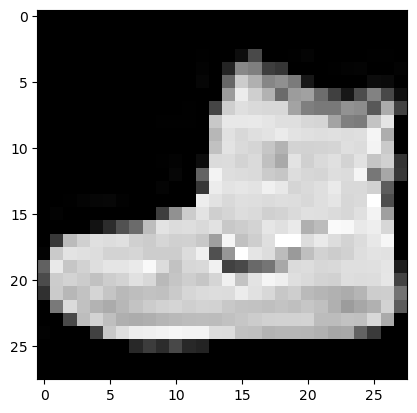

In [11]:
plt.imshow(X_train[0], cmap="gray")
print(y_train[0]);

#### Ploting a grid of 25 images from the training set, each with its corresponding label as the x-axis label, and removing  the ticks on both axes.

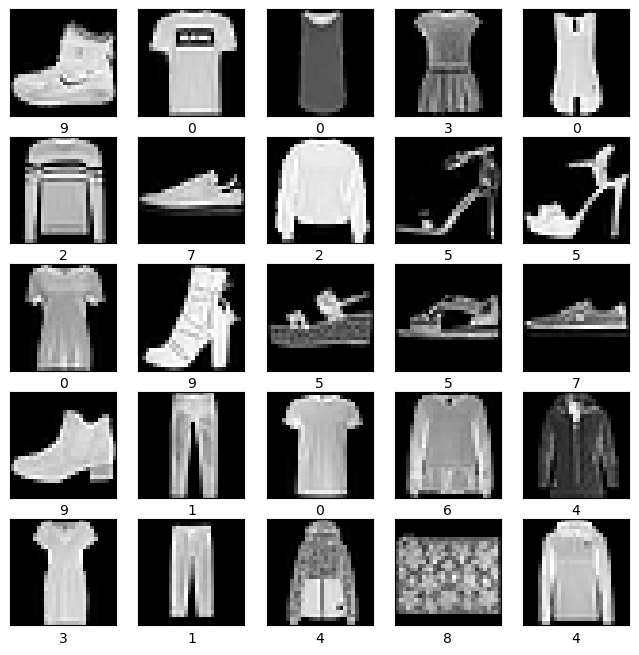

In [12]:
plt.figure(figsize=(8, 8))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([]);

#### Normalizing the pixel values of the training, validation, and testing datasets by dividing them by 255, which scales the values between 0 and 1.

In [13]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## MODEL 1

### Flatten input layer and output layer

#### Creating a sequential model called ann1 consisting of a flatten layer to convert the input shape to a 1D array, followed by a dense layer with 10 units and softmax activation and then compiling the model using the Adam optimizer, sparse categorical crossentropy loss, and accuracy metric.

In [15]:
# Use a flatten input layer and output layer

ann1 = models.Sequential([
                        layers.Flatten(input_shape=(28, 28)),
                        layers.Dense(10, activation='softmax')
])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
ann1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Training  the sequential model ann1 using the training data (X_train and y_train) for 5 epochs.

In [17]:
ann1.fit(X_train, y_train, epochs=5)

Epoch 1/5


1563/1563 [==============================] - 4s 2ms/step - loss: 0.6203 - accuracy: 0.7893
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4689 - accuracy: 0.8399
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4404 - accuracy: 0.8491
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4269 - accuracy: 0.8526
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4155 - accuracy: 0.8564


#### Training  the sequential model ann1 using the training data (X_train and y_train) for 10 epochs, while also validating on the validation data (X_valid and y_valid). 

In [18]:
info = ann1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4094 - accuracy: 0.8591 - val_loss: 0.4295 - val_accuracy: 0.8527
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4030 - accuracy: 0.8606 - val_loss: 0.4639 - val_accuracy: 0.8403
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4001 - accuracy: 0.8612 - val_loss: 0.4288 - val_accuracy: 0.8519
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3951 - accuracy: 0.8636 - val_loss: 0.4220 - val_accuracy: 0.8541
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3924 - accuracy: 0.8630 - val_loss: 0.4277 - val_accuracy: 0.8524
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3899 - accuracy: 0.8636 - val_loss: 0.4390 - val_accuracy: 0.8456
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3873 - accuracy: 0.8641 - val_loss: 0.4171 - val_accuracy:

#### Plotting the training and validation accuracy (top) and loss (bottom) over epochs. Setting the y-axis limits for accuracy between 0.8 and 1.0 and for loss between 0.2 and 0.6.

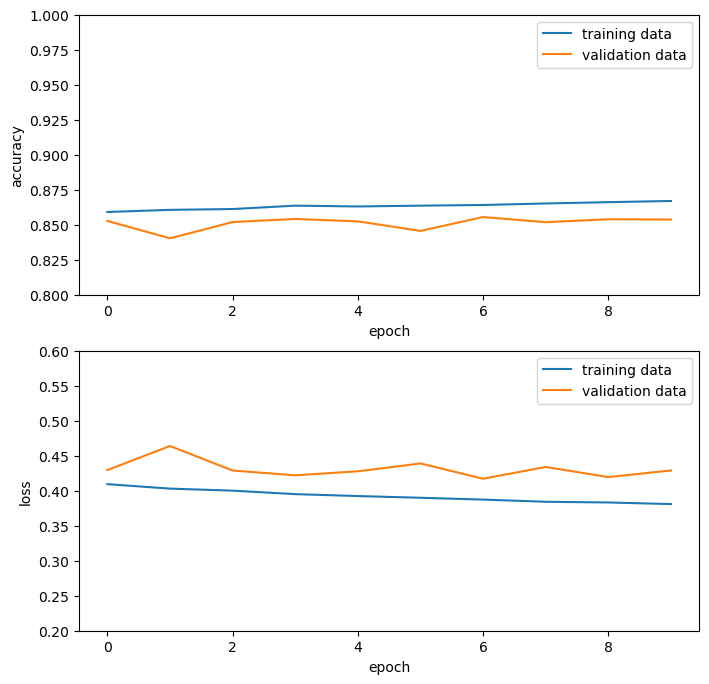

In [19]:
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.2,0.6])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

#### Evaluating  the performance of the neural network model `ann1` using the testing dataset `X_test` and corresponding labels `y_test`. This command calculates metrics such as accuracy and loss, providing insights into the model's effectiveness in making predictions on unseen data.


In [20]:
ann1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4551 - accuracy: 0.8416


[0.45510420203208923, 0.8416000008583069]

#### Generating  predictions using the trained neural network model `ann1` on the testing dataset `X_test`, with `y_pred` representing the predicted labels for the first sample in the dataset.

In [21]:
y_pred = ann1.predict(X_test)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([1.6657302e-07, 2.3208098e-09, 7.1457453e-06, 5.1349152e-06,
       2.9332512e-06, 7.3029704e-02, 3.0715757e-05, 3.7911780e-02,
       3.9769351e-03, 8.8503540e-01], dtype=float32)

In [22]:
np.argmax(y_pred[0])

9

#### Displaying  the first sample from the testing dataset `X_test` as an image in grayscale using Matplotlib's `imshow` function, and print its corresponding label `y_test[0]`.


9


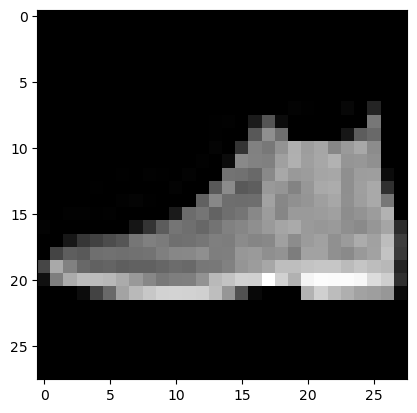

In [23]:
plt.imshow(X_test[0], cmap="gray")
print(y_test[0]);

#### Generating  predicted labels for each sample in the testing dataset `X_test` using the `argmax` function from NumPy, applied to the output predictions `y_pred` obtained from the neural network model `ann1`.

In [24]:
y_pred_labels = [np.argmax(i) for i in y_pred]

#### Calculating the confusion matrix using the true labels `y_test` and the predicted labels `y_pred_labels` obtained from the neural network model. The confusion matrix provides a summary of the model's performance by comparing predicted labels against the true labels.


In [25]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[741,   2,  13,  67,   8,   0, 149,   0,  20,   0],
       [  1, 953,   2,  33,   6,   0,   3,   0,   2,   0],
       [ 12,   5, 677,  14, 192,   0,  83,   0,  17,   0],
       [ 12,   6,  10, 889,  41,   0,  35,   0,   7,   0],
       [  0,   1,  63,  33, 833,   0,  62,   0,   8,   0],
       [  0,   0,   0,   1,   0, 922,   0,  51,   5,  21],
       [ 86,   1, 105,  57, 165,   0, 556,   0,  30,   0],
       [  0,   0,   0,   0,   0,  33,   0, 940,   0,  27],
       [  3,   1,   5,  11,   4,   4,   8,   4, 960,   0],
       [  0,   0,   0,   0,   0,  13,   0,  41,   1, 945]], dtype=int64)

#### Visualizing the confusion matrix using a heatmap plot with Seaborn's `heatmap` function. The heatmap displays the confusion matrix `cm`, annotating each cell with the count of observations. Additional formatting options include displaying the annotations, formatting them as integers (`fmt='d'`), and adjusting the size of the annotations (`annot_kws={"size":12}`). Axis labels for the predicted and actual classes are also provided.


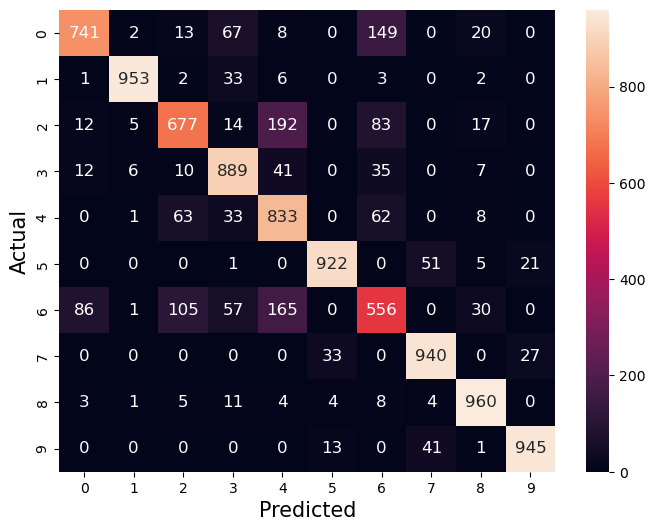

In [26]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":12})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.77      0.68      0.72      1000
           3       0.80      0.89      0.84      1000
           4       0.67      0.83      0.74      1000
           5       0.95      0.92      0.94      1000
           6       0.62      0.56      0.59      1000
           7       0.91      0.94      0.92      1000
           8       0.91      0.96      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



#### The classification report summarizes the model's performance with the following key metrics:

- Precision: Represents the ratio of correctly predicted positive observations to the total predicted positives. It measures the model's accuracy in predicting positive classes.
- Recall: Indicates the ratio of correctly predicted positive observations to the actual positives. It measures the model's ability to find all the positive samples.
- F1-score: Combines precision and recall into a single metric. It is the harmonic mean of precision and recall and provides a balance between the two.
- Support: Represents the number of occurrences of each class in the test dataset.

Overall, the model achieved an accuracy of 84%. The precision, recall, and F1-score vary across different classes, indicating variations in the model's performance for different types of clothing items.

## MODEL 2

**ANN with one hidden layer, where no. of neurons = 128 and activation function of hidden layer is 'relu', optimizer='adam'**

#### Created a sequential model (ann2) with one hidden layer consisting of 128 neurons with ReLU activation function and an output layer with 10 neurons using softmax activation. Compiled the model using the Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric. Trained the model on the training data (X_train, y_train) for 5 epochs.


In [28]:
# Use one hidden layer

ann2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann2.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 0.5170 - accuracy: 0.8184
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3778 - accuracy: 0.8638
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3430 - accuracy: 0.8751
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3148 - accuracy: 0.8837
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2962 - accuracy: 0.8904


#### Evaluated the performance of the model (ann2) on the validation dataset (X_valid, y_valid) to assess its accuracy and loss.


In [29]:
ann2.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.3883 - accuracy: 0.8574


[0.3882704973220825, 0.8574000000953674]

In [30]:
ann2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Trained the model (ann2) using the training dataset (X_train, y_train) for 10 epochs, while also validating its performance on the validation dataset (X_valid, y_valid).

In [31]:
info1 = ann2.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.8951 - val_loss: 0.3590 - val_accuracy: 0.8725
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.9001 - val_loss: 0.3397 - val_accuracy: 0.8815
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2588 - accuracy: 0.9041 - val_loss: 0.3176 - val_accuracy: 0.8887
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2474 - accuracy: 0.9076 - val_loss: 0.3661 - val_accuracy: 0.8784
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2392 - accuracy: 0.9089 - val_loss: 0.3156 - val_accuracy: 0.8865
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2304 - accuracy: 0.9129 - val_loss: 0.3208 - val_accuracy: 0.8862
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2238 - accuracy: 0.9161 - val_loss: 0.3126 - val_accuracy:

#### Plotted the training and validation accuracy (top) and loss (bottom) over epochs. The y-axis limits were set to visualize accuracy between 0.80 and 1.0 and loss between 0.1 and 0.5.


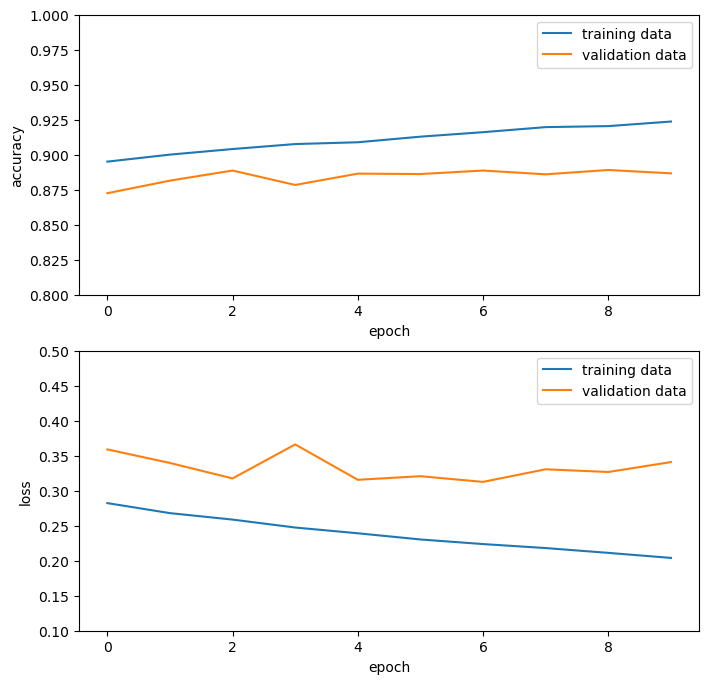

In [32]:
acc = info1.history['accuracy']
val_acc = info1.history['val_accuracy']

loss = info1.history['loss']
val_loss = info1.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,0.5])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

#### Evaluated the performance of the model (ann2) on the test dataset (X_test, y_test) using the evaluation metrics specified during compilation. 

In [33]:
ann2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3653 - accuracy: 0.8823


[0.3653034567832947, 0.8823000192642212]

#### Generated predictions (y_pred) for the test dataset (X_test) using the trained model (ann2).


In [34]:
y_pred = ann2.predict(X_test)

313/313 [==============================] - 1s 2ms/step


#### Converted the raw predictions (y_pred) generated by the model into class labels by taking the index of the maximum value in each prediction array.

In [35]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [36]:
from sklearn.metrics import confusion_matrix 

cm1 = confusion_matrix(y_test, y_pred_labels)
cm1

array([[867,   1,  10,  12,   4,   0, 103,   1,   2,   0],
       [  7, 968,   0,  14,   3,   0,   8,   0,   0,   0],
       [ 25,   1, 774,  13, 118,   1,  67,   0,   1,   0],
       [ 36,   2,   7, 881,  37,   1,  34,   0,   2,   0],
       [  0,   0,  66,  24, 848,   0,  60,   0,   2,   0],
       [  0,   0,   0,   0,   0, 933,   0,  28,   1,  38],
       [142,   0,  77,  29,  72,   0, 673,   0,   7,   0],
       [  0,   0,   0,   0,   0,   7,   0, 942,   0,  51],
       [  7,   0,   6,   5,   2,   4,  12,   6, 958,   0],
       [  0,   0,   0,   0,   0,   2,   1,  18,   0, 979]], dtype=int64)

#### Visualized the confusion matrix (cm1) using a heatmap, where each cell represents the number of predictions made for each class. The heatmap includes annotations of the cell values with a specified format ('d'), and adjusted the font size of the annotations to 12. The x-axis label indicates the predicted classes, while the y-axis label indicates the actual classes.


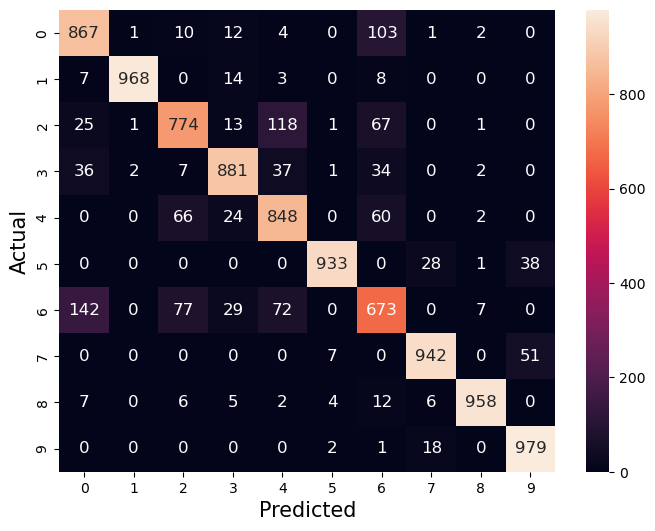

In [37]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm1, annot=True, fmt='d', annot_kws={"size":12})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1000
           1       1.00      0.97      0.98      1000
           2       0.82      0.77      0.80      1000
           3       0.90      0.88      0.89      1000
           4       0.78      0.85      0.81      1000
           5       0.98      0.93      0.96      1000
           6       0.70      0.67      0.69      1000
           7       0.95      0.94      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



#### The model achieved an accuracy of 88%, indicating strong performance in classifying fashion items. While precision, recall, and F1-scores varied across different classes, the overall performance demonstrates the effectiveness of the trained neural network in recognizing various types of clothing with high accuracy.

## MODEL 3

**ANN with hidden layer, batch normalization and dropout, optimizer='SGD'**

#### Created a neural network model (ann3) using TensorFlow's Keras API with a sequential architecture. The model consists of a flatten layer to reshape the input data, followed by a dense layer with 150 neurons and ReLU activation function. Batch normalization and dropout with a rate of 0.1 are applied before the output layer with 10 neurons and softmax activation. Compiled the model using Stochastic Gradient Descent (SGD) optimizer with a learning rate of 0.005, sparse categorical crossentropy loss function, and accuracy metric. Trained the model on the training data (X_train, y_train) for 5 epochs.


In [42]:
# Use dropout and batch normalization, SGD optimizer with learning rate

from keras.layers import Dropout, BatchNormalization
from keras.optimizers import SGD

ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(150, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

opt = optimizers.SGD(learning_rate=0.001)

ann3.compile(optimizer= opt,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann3.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8740 - accuracy: 0.7069
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6080 - accuracy: 0.7939
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5502 - accuracy: 0.8117
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5182 - accuracy: 0.8225
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4947 - accuracy: 0.8304


#### Evaluated the performance of the model (ann3) on the validation dataset (X_valid, y_valid) to assess its accuracy and loss.


In [43]:
ann3.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.4501 - accuracy: 0.8402


[0.45013341307640076, 0.8402000069618225]

In [44]:
ann3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 150)               117750    
                                                                 
 batch_normalization_3 (Bat  (None, 150)               600       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1510      
                                                                 
Total params: 119860 (468.20 KB)
Trainable params: 119560 (467.03 KB)
Non-trainable params: 300 (1.17 KB)
______________

#### Trained the model (ann3) using the training dataset (X_train, y_train) for 10 epochs, while also validating its performance on the validation dataset (X_valid, y_valid).

In [45]:
info2 = ann3.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4787 - accuracy: 0.8339 - val_loss: 0.4398 - val_accuracy: 0.8446
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4632 - accuracy: 0.8403 - val_loss: 0.4332 - val_accuracy: 0.8453
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4509 - accuracy: 0.8438 - val_loss: 0.4200 - val_accuracy: 0.8502
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4443 - accuracy: 0.8469 - val_loss: 0.4121 - val_accuracy: 0.8538
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4355 - accuracy: 0.8488 - val_loss: 0.4070 - val_accuracy: 0.8567
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4258 - accuracy: 0.8518 - val_loss: 0.4001 - val_accuracy: 0.8559
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4188 - accuracy: 0.8537 - val_loss: 0.3952 - val_accuracy:

#### Plotted the training and validation accuracy (top) and loss (bottom) over epochs using Matplotlib. The y-axis limits for accuracy are set between 0.80 and 1.0, and for loss between 0.1 and 0.4. The plot illustrates the trend of accuracy and loss for both training and validation datasets as the number of epochs increases.


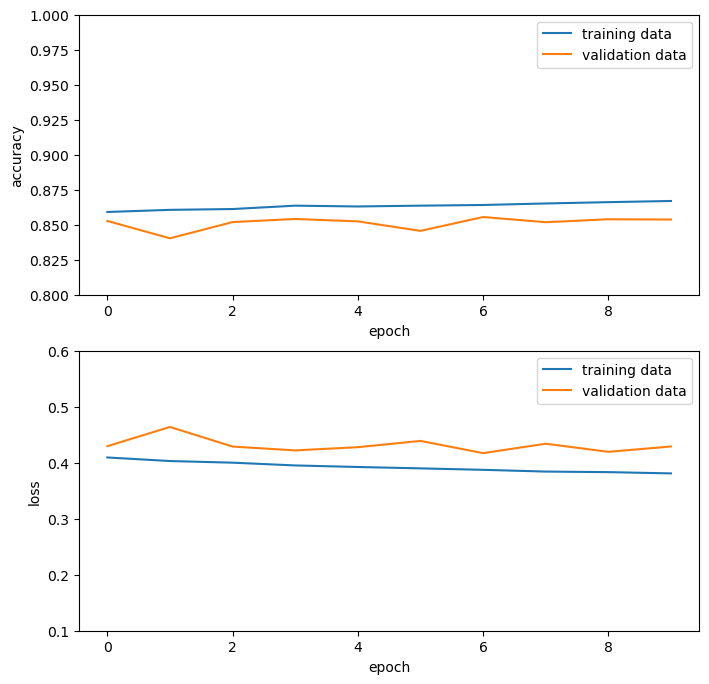

In [46]:
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,0.6])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

#### Evaluated the performance of the model `ann3` on the test dataset `(X_test, y_test)` using the `evaluate` method. This method computes the loss value and accuracy of the model on the test data.


In [47]:
ann3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4127 - accuracy: 0.8544


[0.41273853182792664, 0.8543999791145325]

In [48]:
y_pred = ann3.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [49]:
y_pred_labels = [np.argmax(i) for i in y_pred]

#### Computed the confusion matrix `cm2` using the `confusion_matrix` function from the scikit-learn library. The confusion matrix compares the true labels `y_test` with the predicted labels `y_pred_labels`, providing insight into the performance of the classification model.


In [50]:
from sklearn.metrics import confusion_matrix 

cm2 = confusion_matrix(y_test, y_pred_labels)
cm2

array([[829,   1,  21,  40,   2,   0,  95,   0,  12,   0],
       [  4, 956,   5,  27,   3,   0,   2,   0,   3,   0],
       [ 13,   1, 793,  10, 103,   2,  69,   0,   9,   0],
       [ 28,  10,  12, 873,  32,   0,  42,   0,   3,   0],
       [  0,   1, 132,  37, 755,   0,  69,   0,   6,   0],
       [  0,   0,   1,   2,   0, 926,   0,  38,   5,  28],
       [158,   2, 126,  33,  86,   1, 575,   0,  19,   0],
       [  0,   0,   0,   0,   0,  24,   0, 933,   1,  42],
       [  3,   1,   9,   6,   3,   5,  12,   5, 956,   0],
       [  0,   0,   0,   0,   0,  12,   0,  39,   1, 948]], dtype=int64)

#### Visualized the confusion matrix `cm2` using Seaborn's heatmap function. The heatmap is annotated with the values of the confusion matrix and formatted as integers. The `annot_kws` parameter is used to set the font size of the annotations to 12. The x-axis and y-axis labels are added with the specified font sizes of 15.


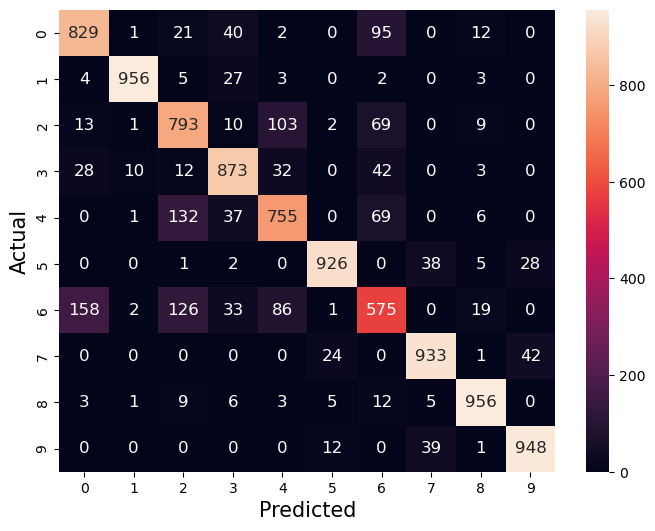

In [51]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm2, annot=True, fmt='d', annot_kws={"size":12})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.72      0.79      0.76      1000
           3       0.85      0.87      0.86      1000
           4       0.77      0.76      0.76      1000
           5       0.95      0.93      0.94      1000
           6       0.67      0.57      0.62      1000
           7       0.92      0.93      0.93      1000
           8       0.94      0.96      0.95      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



#### The model achieved an overall accuracy of 85% on the test dataset. It demonstrates good precision, recall, and F1-score across different classes, indicating a balanced performance in classification tasks.


## MODEL 4

**ANN with 2 hidden layers, l1_l2 regularization, optimizer='adam'**

#### The model `ann4` is a sequential neural network with three layers: two dense hidden layers with ReLU activation functions and one output layer with a softmax activation function. The first hidden layer has 150 neurons and utilizes l1_l2 regularization, while the second hidden layer has 148 neurons. The model is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric. It is trained on the training dataset (`X_train` and `y_train`) for 20 epochs.


In [53]:
# Use l1_l2 regularization

from keras.layers import Dropout, BatchNormalization
from keras import regularizers


ann4 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(150, activation='relu',kernel_regularizer='l1_l2'),
    layers.Dense(148, activation='relu'),
    layers.Dense(10, activation='softmax')
])


ann4.compile(optimizer= 'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann4.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3129 - accuracy: 0.7262
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0882 - accuracy: 0.7744
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0300 - accuracy: 0.7844
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0020 - accuracy: 0.7896
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9742 - accuracy: 0.7927
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9623 - accuracy: 0.7934
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9480 - accuracy: 0.7957
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9323 - accuracy: 0.7986
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9252 - accuracy: 0.8014
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.917

In [54]:
info3 = ann4.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8855 - accuracy: 0.8046 - val_loss: 0.8587 - val_accuracy: 0.8109
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8937 - accuracy: 0.8044 - val_loss: 0.9209 - val_accuracy: 0.7831
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8849 - accuracy: 0.8047 - val_loss: 0.9376 - val_accuracy: 0.7938
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8934 - accuracy: 0.8053 - val_loss: 0.8809 - val_accuracy: 0.8021
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8911 - accuracy: 0.8037 - val_loss: 0.9552 - val_accuracy: 0.7667
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8821 - accuracy: 0.8075 - val_loss: 0.9382 - val_accuracy: 0.7782
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8905 - accuracy: 0.8029 - val_loss: 0.9404 - val_accuracy:

#### Visualizing the training and validation accuracy (top) and loss (bottom) over epochs for `ann4` model trained for 10 epochs with validation data. The plots show the progression of accuracy and loss metrics during training, providing insights into the model's performance and potential overfitting or underfitting.

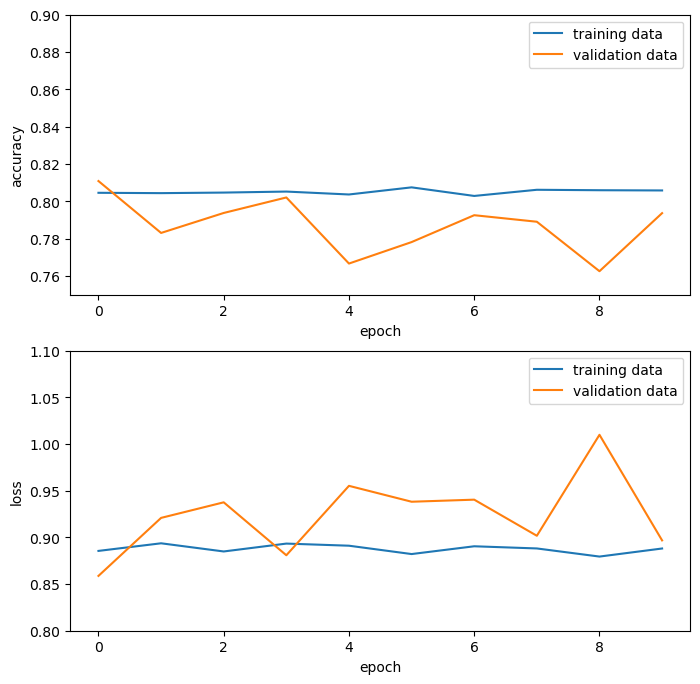

In [58]:
acc = info3.history['accuracy']
val_acc = info3.history['val_accuracy']

loss = info3.history['loss']
val_loss = info3.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.75,0.9])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.8,1.1])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [59]:
ann4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9182 - accuracy: 0.7851


[0.9181639552116394, 0.785099983215332]

In [60]:
y_pred = ann4.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [61]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [62]:
from sklearn.metrics import confusion_matrix 

cm3 = confusion_matrix(y_test, y_pred_labels)
cm3

array([[726,   3,  23,  81,   7,   6, 127,   0,  27,   0],
       [  5, 946,   5,  38,   1,   2,   0,   0,   3,   0],
       [  7,   4, 776,   9, 143,   0,  28,   0,  33,   0],
       [ 24,   7,  33, 861,  29,   0,  36,   0,   8,   2],
       [  0,   1, 217,  34, 710,   1,   8,   0,  29,   0],
       [  0,   0,   0,   0,   0, 899,   0,  22,  17,  62],
       [134,   1, 260,  51, 254,   3, 229,   0,  68,   0],
       [  0,   0,   0,   0,   0,  68,   0, 784,   5, 143],
       [  0,   3,   7,   5,   4,   8,   4,   3, 964,   2],
       [  0,   0,   0,   0,   0,  24,   0,  19,   1, 956]], dtype=int64)

#### Generating a heatmap visualization of the confusion matrix (`cm3`) using seaborn. The heatmap provides a clear representation of the model's predictions versus the actual labels, with annotations indicating the count of each class. This visualization helps in understanding the model's performance in classifying different categories.

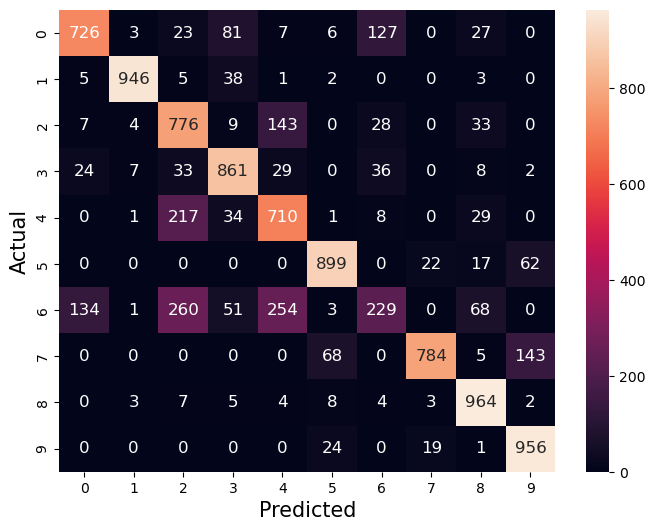

In [63]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm3, annot=True, fmt='d', annot_kws={"size":12})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1000
           1       0.98      0.95      0.96      1000
           2       0.59      0.78      0.67      1000
           3       0.80      0.86      0.83      1000
           4       0.62      0.71      0.66      1000
           5       0.89      0.90      0.89      1000
           6       0.53      0.23      0.32      1000
           7       0.95      0.78      0.86      1000
           8       0.83      0.96      0.89      1000
           9       0.82      0.96      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.78      0.79      0.77     10000
weighted avg       0.78      0.79      0.77     10000



#### The overall accuracy of the model on the test dataset is 79%. This means that the model correctly predicts the class labels for 79% of the samples in the test dataset. The macro-average F1-score, which gives equal weight to each class, is 0.77, indicating moderate performance across different classes. Despite variations in precision, recall, and F1-score for different classes, the model achieves a decent performance overall, demonstrating its ability to classify fashion items effectively.


## MODEL 5

**ANN with bias and weights initilization**

#### The code defines a neural network model `ann5` with two hidden layers and an output layer. The hidden layers have 150 and 148 neurons respectively, with ReLU activation functions. The output layer has 10 neurons with softmax activation, suitable for multi-class classification tasks. The model uses Random Normal initialization for weights and Zeros initialization for biases. It is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric. Finally, the model is trained on the training dataset (`X_train` and `y_train`) for 20 epochs.


In [65]:
from keras import models, layers
from keras import regularizers, initializers

# Define your model
ann5 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(150, activation='relu', 
                 kernel_initializer=initializers.RandomNormal(stddev=0.01),
                 bias_initializer=initializers.Zeros()),
    layers.Dense(148, activation='relu',
                 kernel_initializer=initializers.RandomNormal(stddev=0.01),
                 bias_initializer=initializers.Zeros()),
    layers.Dense(10, activation='softmax')
])

# Compile the model
ann5.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train the model
ann5.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5357 - accuracy: 0.8060
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3853 - accuracy: 0.8606
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3434 - accuracy: 0.8740
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3170 - accuracy: 0.8829
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3010 - accuracy: 0.8875
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.8939
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2689 - accuracy: 0.8989
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2576 - accuracy: 0.9036
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2466 - accuracy: 0.9080
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.235

#### The code trains the neural network model `ann5` on the training dataset (`X_train` and `y_train`) for 10 epochs while also validating on the validation dataset (`X_valid` and `y_valid`). The training progress and performance on both the training and validation sets are recorded in the `info4` variable for further analysis.


In [66]:
info4 = ann5.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1631 - accuracy: 0.9371 - val_loss: 0.3860 - val_accuracy: 0.8910
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1568 - accuracy: 0.9395 - val_loss: 0.4187 - val_accuracy: 0.8836
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1569 - accuracy: 0.9403 - val_loss: 0.3805 - val_accuracy: 0.8921
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1489 - accuracy: 0.9439 - val_loss: 0.3819 - val_accuracy: 0.8929
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1454 - accuracy: 0.9442 - val_loss: 0.3919 - val_accuracy: 0.8901
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1421 - accuracy: 0.9455 - val_loss: 0.4059 - val_accuracy: 0.8903
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1394 - accuracy: 0.9466 - val_loss: 0.4246 - val_accuracy:

#### The code plots the training and validation accuracy (top) and loss (bottom) over epochs based on the recorded history from the training of the `ann5` model. It visualizes how these metrics change over the course of training, providing insights into the model's performance and convergence.


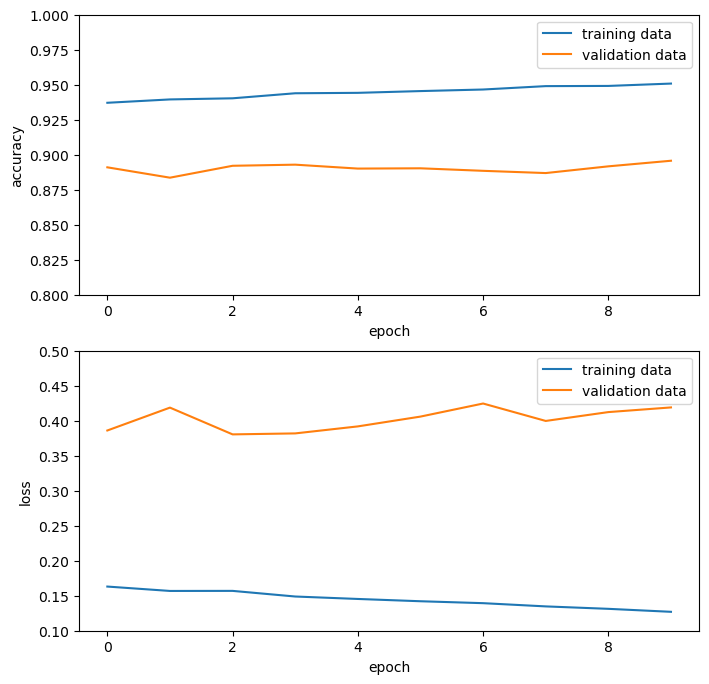

In [70]:
acc = info4.history['accuracy']
val_acc = info4.history['val_accuracy']

loss = info4.history['loss']
val_loss = info4.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.8,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,0.5])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

#### The `evaluate` method is used to assess the performance of the `ann5` model on the test dataset (`X_test` and `y_test`). It computes the loss and accuracy metrics of the model on the test data and returns them as a tuple. This markdown description can be used to summarize the evaluation results of the `ann5` model on the test dataset.


In [71]:
ann5.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4450 - accuracy: 0.8867


[0.4450282156467438, 0.8866999745368958]

In [72]:
y_pred = ann5.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [73]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [74]:
from sklearn.metrics import confusion_matrix 

cm4 = confusion_matrix(y_test, y_pred_labels)
cm4

array([[859,   1,  15,  24,  11,   1,  84,   0,   5,   0],
       [  4, 970,   0,  17,   7,   0,   1,   0,   1,   0],
       [ 15,   1, 766,  15, 127,   0,  74,   0,   2,   0],
       [ 17,   8,  10, 874,  69,   0,  19,   0,   3,   0],
       [  2,   0,  57,   9, 874,   0,  56,   0,   2,   0],
       [  0,   0,   0,   0,   0, 974,   0,  13,   4,   9],
       [142,   0,  71,  30,  66,   0, 682,   0,   9,   0],
       [  0,   0,   0,   0,   0,  15,   0, 954,   1,  30],
       [  9,   0,   4,   6,   4,   2,   4,   3, 968,   0],
       [  0,   0,   0,   0,   0,  18,   1,  35,   0, 946]], dtype=int64)

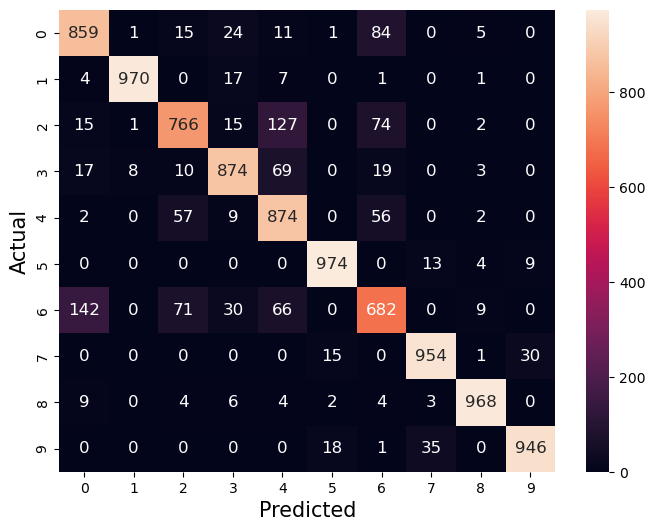

In [75]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm4, annot=True, fmt='d', annot_kws={"size":12})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.77      0.80      1000
           3       0.90      0.87      0.89      1000
           4       0.75      0.87      0.81      1000
           5       0.96      0.97      0.97      1000
           6       0.74      0.68      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



#### The overall accuracy of the model on the test dataset is 89%. This indicates that the model correctly predicts the class labels for 89% of the samples in the test dataset. Considering the macro-average F1-score, which gives equal weight to each class, is also 0.89. These values indicate that the model performs consistently well across different classes, demonstrating its robustness in classifying fashion items.



## CONCLUSION:

From the above 5 different ANN models that were build, Model 2 and Model 5 showed good accuracy of 88% and 89% respectively. Also, by comparing the accuracies of the training and validation data, we observed that there was no overfitting for both the models.

* **Model 2:** For model 2, we created an ANN with one hidden layer consisting of 128 neurons with ReLU activation function and an output layer with 10 neurons using softmax activation. Compiled the model using the Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric.


* **Model 5:** Here, we created an ANN with two hidden layers and an output layer. The hidden layers have 150 and 148 neurons respectively, with ReLU activation functions. The output layer has 10 neurons with softmax activation, suitable for multi-class classification tasks. The model uses Random Normal initialization for weights and Zeros initialization for biases. It is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric.

